## ACTD 2024 - 20

### Clases 13-14: redes neuronales para clasificación

- Redes densas
- Redes para clasificación
- Procesamiento de datos continuos y categóricos
- Funciones de activación y pérdida

Empecemos importando numpy, pandas, keras, tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

2024-09-30 17:37:54.676499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [2]:
df = pd.read_csv('heart.csv')

Exploremos las primeras filas del dataframe.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Descripción de las variables:

https://archive.ics.uci.edu/dataset/45/heart+disease


Exploremos el tamaño del df

In [4]:
df.shape

(303, 14)

Identificamos NAs en los datos

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Definimos listas para las variables categóricas enteras, categóricas string y numéricas.

In [6]:
cat_int_feats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca']

In [7]:
cat_str_feats = ['thal']

In [8]:
num_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']

Agregamos las listas de categorías

In [9]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

Reordenamos el dataframe de acuerdo con el tipo de variable

In [10]:
df = df[feats_ordered+['target']]

In [11]:
df.head()

,sex,cp,fbs,restecg,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,slope,target
0,1,1,1,2,0,0,fixed,63,145,233,150,2.3,3,0
1,1,4,0,2,1,3,normal,67,160,286,108,1.5,2,1
2,1,4,0,2,1,2,reversible,67,120,229,129,2.6,2,0
3,1,3,0,0,0,0,normal,37,130,250,187,3.5,3,0
4,0,2,0,2,0,0,normal,41,130,204,172,1.4,1,0


In [12]:
df["target"].unique()

array([0, 1])

In [13]:
df.dtypes

sex           int64
cp            int64
fbs           int64
restecg       int64
exang         int64
ca            int64
thal         object
age           int64
trestbps      int64
chol          int64
thalach       int64
oldpeak     float64
slope         int64
target        int64
dtype: object

Separamos los datos en entrenamiento, validación y prueba

In [14]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,sex,cp,fbs,restecg,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,slope,target
69,0,4,0,0,0,0,normal,35,138,183,182,1.4,1,0
300,1,4,0,2,0,1,reversible,65,135,254,127,2.8,2,1
220,1,1,0,0,0,2,normal,59,134,204,162,0.8,1,0
134,1,3,1,0,0,0,reversible,42,120,240,194,0.8,3,0
7,0,4,0,0,1,0,normal,57,120,354,163,0.6,1,0


In [15]:
train.shape

(242, 14)

In [16]:
test = df.drop(train.index)
test.head()

,sex,cp,fbs,restecg,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,slope,target
0,1,1,1,2,0,0,fixed,63,145,233,150,2.3,3,0
2,1,4,0,2,1,2,reversible,67,120,229,129,2.6,2,0
4,0,2,0,2,0,0,normal,41,130,204,172,1.4,1,0
8,1,4,0,2,0,1,reversible,63,130,254,147,1.4,2,1
13,1,2,0,0,0,0,reversible,44,120,263,173,0.0,1,0


In [17]:
val = train.sample(frac=0.2, random_state=100)

In [18]:
val.shape

(48, 14)

In [19]:
train = train.drop(val.index)

In [20]:
print(train.shape)
print(val.shape)
print(test.shape)

(194, 14)
(48, 14)
(61, 14)


Calculamos estadísticas de cada variable numérica

In [21]:
train.describe()

,sex,cp,fbs,restecg,exang,ca,age,trestbps,chol,thalach,oldpeak,slope,target
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.664948,3.097938,0.134021,1.000000,0.319588,0.649485,54.953608,132.876289,249.974227,150.412371,0.990722,1.577320,0.257732
std,0.473230,1.030969,0.341556,0.997406,0.467523,0.927878,8.754150,17.952879,52.803226,22.809984,1.110625,0.590689,0.438517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,94.000000,126.000000,88.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,49.000000,120.000000,215.750000,138.250000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,56.000000,130.000000,243.000000,154.000000,0.600000,2.000000,0.000000
75%,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,61.000000,143.500000,281.000000,167.750000,1.600000,2.000000,1.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,77.000000,192.000000,564.000000,195.000000,4.400000,3.000000,1.000000


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [22]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [23]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [24]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

Ejemplo de cómo queda el tf.dataset

In [25]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'fixed'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=52>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=118>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=186>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=190>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
Target: tf.Tensor(0, shape=(), dtype=int64)


Separamos los datos de entrenamiento, validación y prueba en lotes

In [26]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Función para codificar variables numéricas (Keras docs)

In [27]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

Función para codificar variables categóricas (Keras docs)

In [28]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

Creamos una lista de inputs para el modelo, de acuerdo con cada tipo de variable

In [29]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [30]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [31]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [32]:
for i in inputs:
   print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='sex'), name='sex', description="created by layer 'sex'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='cp'), name='cp', description="created by layer 'cp'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='fbs'), name='fbs', description="created by layer 'fbs'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='restecg'), name='restecg', description="created by layer 'restecg'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='exang'), name='exang', description="created by layer 'exang'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='ca'), name='ca', description="created by layer 'ca'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='thal'), name='thal', description="created by layer 'thal'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='age'), 

Creamos una lista de variables codificadas/normalizadas de acuerdo con su tipo, empleando las funciones de codificación/normalización

In [33]:
feats_encoded=[]

In [34]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [35]:
len_feats = len(feats_encoded)
len_feats

6

In [36]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [37]:
len_feats = len(feats_encoded)
len_feats

7

In [38]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [39]:
for i in feats_encoded:
  print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup/bincount/DenseBincount:0', description="created by layer 'integer_lookup'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='integer_lookup_1/bincount/DenseBincount:0', description="created by layer 'integer_lookup_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup_2/bincount/DenseBincount:0', description="created by layer 'integer_lookup_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='integer_lookup_3/bincount/DenseBincount:0', description="created by layer 'integer_lookup_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup_4/bincount/DenseBincount:0', description="created by layer 'integer_lookup_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='integer_looku

Creamos una capa concatenando todas las variables codificadas

In [40]:
all_feats = keras.layers.concatenate(feats_encoded)

In [41]:
type(all_feats)

keras.src.engine.keras_tensor.KerasTensor

Agregamos una capa densa con 32 neuronas y función de activación relu

In [42]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

Agregamos la capa de salida con 1 neurona (probabilidad de sufrir la enfermedad cardiada) y función de activación sigmoide

In [43]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [44]:
model = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

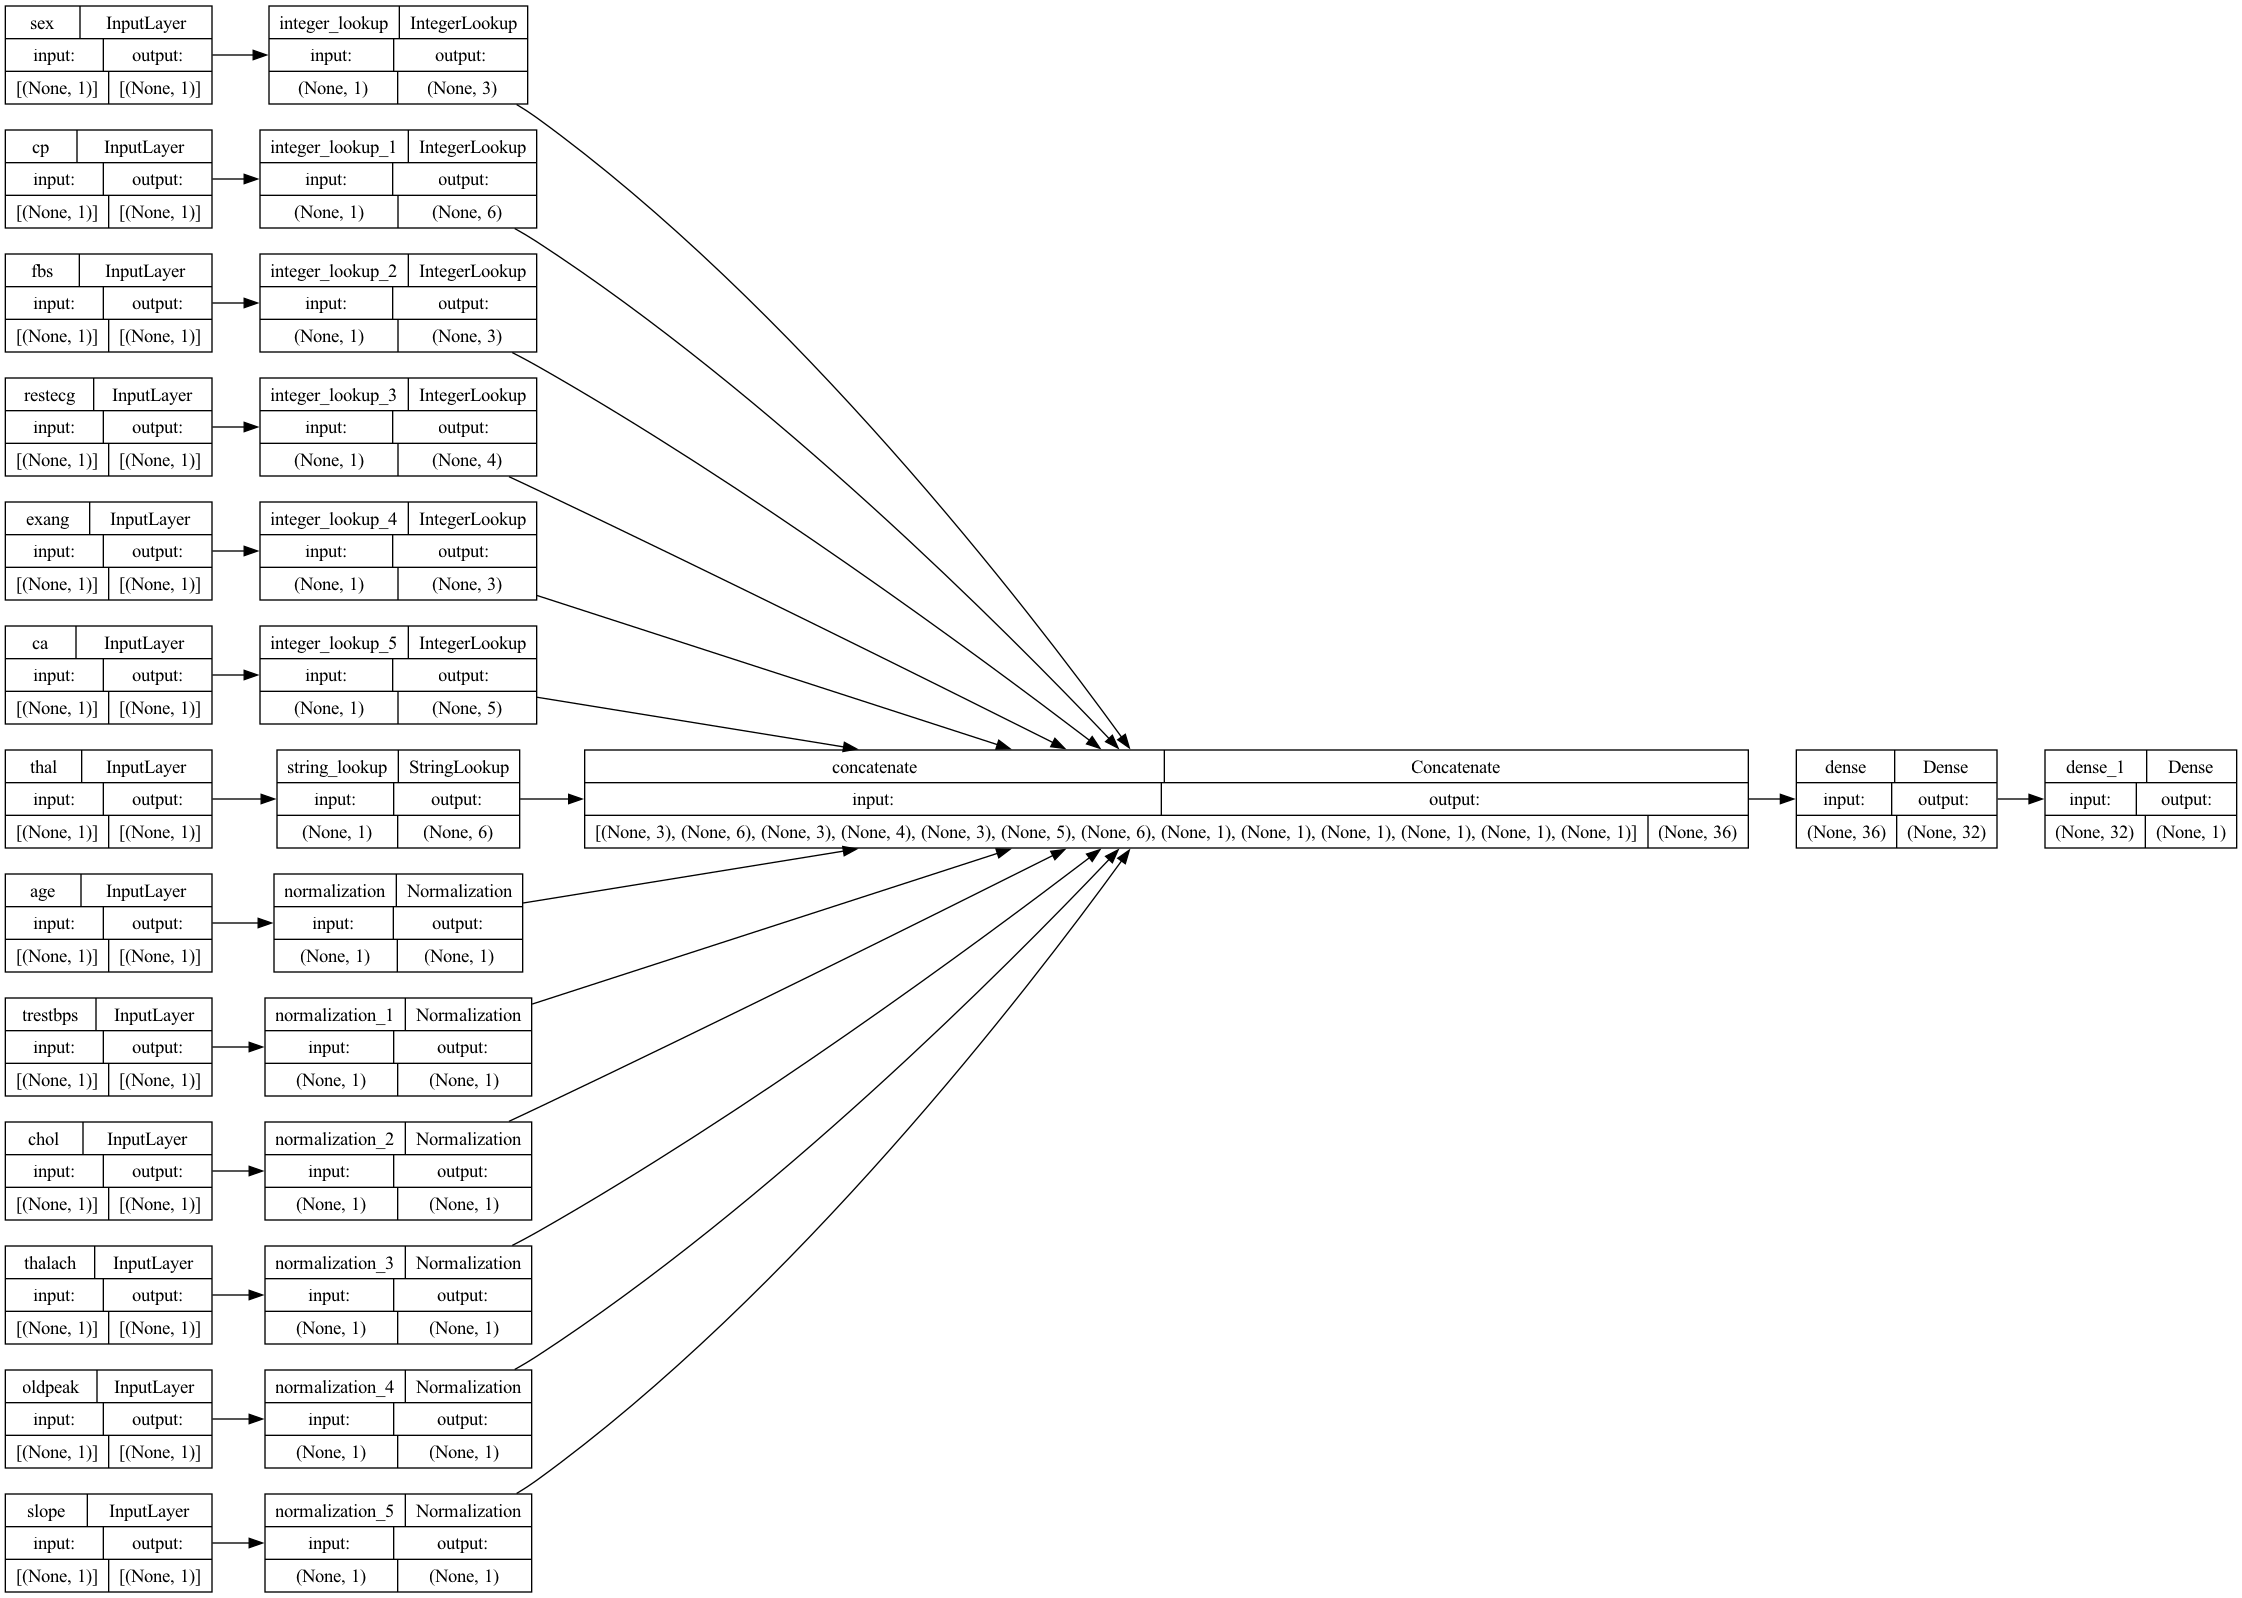

In [46]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Aseguramos que Keras use TensorFlow como backend, para asegurar que el modelo pueda usar strings como entradas

In [47]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Entrenamos el modelo con los datos en el formato tf.Dataset

In [48]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 1s 58ms/step - loss: 0.9390 - accuracy: 0.2165 - val_loss: 0.8403 - val_accuracy: 0.3125
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.8389 - accuracy: 0.2732 - val_loss: 0.7622 - val_accuracy: 0.3750
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7622 - accuracy: 0.3660 - val_loss: 0.6968 - val_accuracy: 0.4792
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5309 - val_loss: 0.6457 - val_accuracy: 0.6250
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.6546 - val_loss: 0.6045 - val_accuracy: 0.7083
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.7216 - val_loss: 0.5723 - val_accuracy: 0.7292
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.7629 - val_loss: 0.5483 - val_accuracy: 0.7292
Epoch 8/50
7/7 [=================